# Analisis de Datos 

Dentro de los inventarios de personal se tiene la particularidad de que se manejan bases de datos de un amplio volumen, dentro de esas bases siempre se encuentra informacion valiosa de la cual podemos obtener insigths (informacion que ayuda a tomar decisiones o informacion de valor) para ello se deben llevar una serie de pasos, los cuales son: 

* Hacer una pregunta de negocio 
* Obtener los datos 
* Explora los datos 
* Analiza los datos 
* Comunica los resultados 
* Toma decisiones 

Es por ello que son los pasos que se realizaran en este estudio a la base de datos que se recolecto de 537 empleados


## La pregunta de negocio en este caso es ¿Como afecta la edad en cuanto a tiempo laborado a la semana y al desarrollo de una empresa de tecnologia?

Se respondera esta pregunta con base en el inventario de personal que se suministro

In [1]:
import pandas as pd
import openpyxl as op
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = pd.read_excel('BASE_1.xlsx')
df.head(2)

,No.,CEDULA,APELLIDOS Y NOMBRES,EDAD,FECHA DE NACIMIENTO,DIRECCIÓN DE CORREO ELECTRÓNICO,NÚMERO DE TELÉFONO,DIRECCIÓN DE CASA,ESTADO CIVIL,FECHA DE INICIO DEL EMPLEO,PUESTO DE TRABAJO ACTUAL,CALIFICACIONES Y HABILIDADES RELEVANTES,INFORMACIÓN DE CONTACTO DE EMERGENCIA,NUMERO DE CONTACTO,HORAS TRABAJADAS A LA SEMANA,INFORMACIÓN DE AUSENCIAS Y VACACIONES,ESTUDIOS COMPLEMENTARIOS 1,ESTUDIOS COMPLEMENTARIOS 2,GUSTOS Y PASATIEMPOS 1,GUSTOS Y PASATIEMPOS 2
0,1,105350,VELASCO ZAMBRANO JESUS REINEL,30,25/3/1993,velasco@consultores.gov.co,5860332,C 11 13 44,Casado/a,14/6/2008,Consultor,Pensamiento crítico,Esposa,3508382745,43,Vacaciones_programadas,Python,Ofimatica,Pintar,Cantar
1,2,136431,VELASQUEZ FORERO AUGUSTO,41,13/3/1982,velasdi@consultores.gov.co,8404478,K 7 15 26,Union Libre,4/8/2019,Diseñador,Resolución de problemas,Tio,3116870353,44,Incapacitado,Ofimatica,Programacion,Pintar,Cantar


Se puede evidenciar que la base de datos de inventario de personal tiene unos componentes que nos son de interes como lo son, la informacion de ausencias y vacaciones, estado civil, gustos y pasatiempos, cargo actual y demas informacion de datos personales de los empleados. Para contestar esta pregunta se inicia separando unicamente las columnas de nuestro interes

In [ ]:
df.keys()

Index(['No.', 'CEDULA', 'APELLIDOS Y NOMBRES', 'EDAD', ' FECHA DE NACIMIENTO',
       ' DIRECCIÓN DE CORREO ELECTRÓNICO', ' NÚMERO DE TELÉFONO',
       ' DIRECCIÓN DE CASA', ' ESTADO CIVIL', ' FECHA DE INICIO DEL EMPLEO',
       ' PUESTO DE TRABAJO ACTUAL', ' CALIFICACIONES Y HABILIDADES RELEVANTES',
       ' INFORMACIÓN DE CONTACTO DE EMERGENCIA', 'NUMERO DE CONTACTO',
       ' HORAS TRABAJADAS A LA SEMANA',
       ' INFORMACIÓN DE AUSENCIAS Y VACACIONES', 'ESTUDIOS COMPLEMENTARIOS 1',
       'ESTUDIOS COMPLEMENTARIOS 2', 'GUSTOS Y PASATIEMPOS 1',
       'GUSTOS Y PASATIEMPOS 2'],
      dtype='object')

In [ ]:
datos_interes = df.loc[:,['EDAD',' PUESTO DE TRABAJO ACTUAL',' HORAS TRABAJADAS A LA SEMANA','ESTUDIOS COMPLEMENTARIOS 1','ESTUDIOS COMPLEMENTARIOS 2']]

In [ ]:
datos_interes.head(2)

,EDAD,PUESTO DE TRABAJO ACTUAL,HORAS TRABAJADAS A LA SEMANA,ESTUDIOS COMPLEMENTARIOS 1,ESTUDIOS COMPLEMENTARIOS 2
0,30,Consultor,43,Python,Ofimatica
1,41,Diseñador,44,Ofimatica,Programacion


Se obtienen las columnas mas relevantes y se inicia por analizar la cantidad de horas trabajadas a la semana de todos los empleados segun su cargo para ver si todos cumplen con su total de horas el cual es 44 para la empresa 

In [ ]:
promedio_horas_cargo = datos_interes.groupby(' PUESTO DE TRABAJO ACTUAL')[' HORAS TRABAJADAS A LA SEMANA'].mean()
df_promedio = pd.DataFrame(promedio_horas_cargo).reset_index()
df_promedio=df_promedio.sort_values(' HORAS TRABAJADAS A LA SEMANA',ascending=False)
df_promedio

,PUESTO DE TRABAJO ACTUAL,HORAS TRABAJADAS A LA SEMANA
0,Analista,46.200000
13,Supervisor,45.756757
11,Operador,45.636364
3,Coordinador,45.631579
12,Programador,45.600000
2,Consultor,45.574468
8,Gerente,45.543478
6,Diseñador,45.435897
5,Director,45.406250
10,Jefe,45.384615


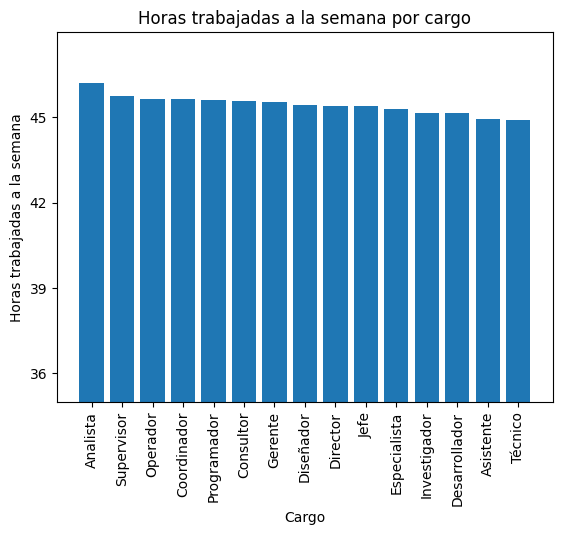

In [ ]:
plt.bar(df_promedio[' PUESTO DE TRABAJO ACTUAL'], df_promedio[' HORAS TRABAJADAS A LA SEMANA'])
plt.xticks(rotation=90)
plt.xlabel('Cargo')
plt.ylabel('Horas trabajadas a la semana')
plt.title('Horas trabajadas a la semana por cargo')
plt.yticks(range(0,48,3))
plt.ylim(35,48)
plt.show()


Podemos ver que las personas que mas horas trabajan a la semana son los analistas y las personas que menos trabajan son los tecnicos y asistentes, ahora bien, vamos a ver el promedio de edad, de cada cargo

In [ ]:
promedio_horas_cargo_1 = datos_interes.groupby(' PUESTO DE TRABAJO ACTUAL').agg(
                                                EDAD =('EDAD','mean'),
                                                HORAS_PROMEDIO_TRABAJADAS_A_LA_SEMANA=(' HORAS TRABAJADAS A LA SEMANA','mean'))
                                             
df_promedio_1 = pd.DataFrame(promedio_horas_cargo_1).reset_index()
df_promedio_1=df_promedio_1.sort_values('HORAS_PROMEDIO_TRABAJADAS_A_LA_SEMANA',ascending=False)
df_promedio_1

,PUESTO DE TRABAJO ACTUAL,EDAD,HORAS_PROMEDIO_TRABAJADAS_A_LA_SEMANA
0,Analista,39.320000,46.200000
13,Supervisor,39.972973,45.756757
11,Operador,41.454545,45.636364
3,Coordinador,38.868421,45.631579
12,Programador,41.266667,45.600000
2,Consultor,38.744681,45.574468
8,Gerente,41.478261,45.543478
6,Diseñador,41.256410,45.435897
5,Director,41.625000,45.406250
10,Jefe,41.256410,45.384615


Por lo que se puede visualizar los cargos hacen alusion a una empresa de tecnologia, ya que cuentan con programadores, diseñadores e investigadores, pero algo peculiar que se puede visualizar es la edad promedio en la cual se encuentran todos los cargos, ya que una empresa de tecnologia por lo general contrata empleados jovenes que suelen estar al tanto de las ultimas tendencias de tegnologia y tiene flexibilidad para trabajar

In [ ]:
edad_promedio_global=datos_interes['EDAD'].mean()
edad_promedio_global

40.303538175046555

La media global de la compañia se ubica en 40 años, por lo que se puede inferir en dos cosas, una es importante contar con personal que tenga la experiencia en la industria y conocimiento especializado, ellos pueden ofrecer una vision estrategica

In [ ]:
print(round((len(datos_interes[(datos_interes['EDAD']>=20) & (datos_interes['EDAD']<=30)])/datos_interes['EDAD'].count())*100,2),"%")
jovenes = len(datos_interes[(datos_interes['EDAD']>=20) & (datos_interes['EDAD']<=30)])
print(f"la cantidad de jovenes es {jovenes}")

19.18 %
la cantidad de jovenes es 103


Por otro lado los empleados jovenes solo son el 19.18% de la compañia lo cual es un factor importante a considerar ya que la curva de crecimiento de esta industria exige profesionales adaptables y por lo general los jovenes presentan este perfil. 

(20.0, 65.0)

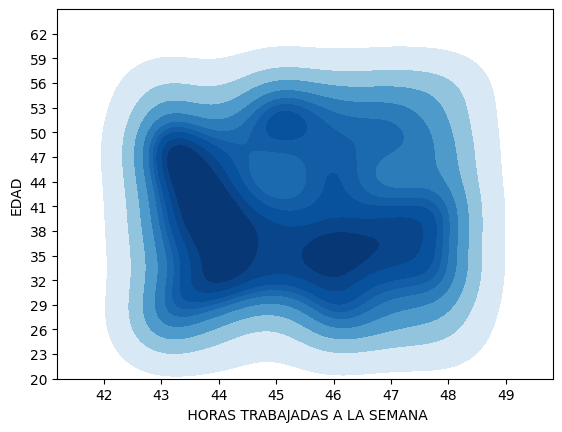

In [ ]:
sns.kdeplot(data=datos_interes,x=' HORAS TRABAJADAS A LA SEMANA',y='EDAD',fill=True,cmap='Blues')
plt.yticks(range(20,65,3))
plt.ylim(20,65)

En el grafico de contornos se puede estudiar el compartamiento de las horas laboradas por edad, lo que nos ayuda a ver que las personas entre los 32 y 37 años son las personas que mas horas trabajan en la compañia, ya que la marca de calor mas alejada del eje y esta en este rango, por otro lado la marca de calor que se encuentra entre los 32 y 47 años se presenta dado que el promedio de personas oscila por este rango de edad y es la cantidad de horas mas habitualmente trabajadas 

## Desarrollo personal

Una vez visto el contexto de edad de la compañia y el tiempo laborado por cada cargo, se puede terminar de responder la pregunta de negocio y avanzar al desarrollo personal, como se vio los jovenes son los mas flexibles en cuando a temas de tecnologia pero esto no deja excentas a las demas personas de adquirir destrezas para mantenerse competitivos en el mercado, es por ello que se analizaran las habilidades adquiridas por cada rango de edad en la compañia para ver los intereses de los empleados 

In [ ]:
datos_interes = df.loc[:,['EDAD',' PUESTO DE TRABAJO ACTUAL',' HORAS TRABAJADAS A LA SEMANA','ESTUDIOS COMPLEMENTARIOS 1','ESTUDIOS COMPLEMENTARIOS 2']]
datos_interes.head(2)


,EDAD,PUESTO DE TRABAJO ACTUAL,HORAS TRABAJADAS A LA SEMANA,ESTUDIOS COMPLEMENTARIOS 1,ESTUDIOS COMPLEMENTARIOS 2
0,30,Consultor,43,Python,Ofimatica
1,41,Diseñador,44,Ofimatica,Programacion


Se puede ver las areas de conocimiento en los cuales los empleados estan interesados, son areas en las cuales el mercado esta solicitando profesionales, por lo tanto si son estudios complementarios se puede ver la intension del personal de aumentar su portafolio de capacidades

In [ ]:
intereses = datos_interes['ESTUDIOS COMPLEMENTARIOS 1'].value_counts()
intereses

Excel                75
Matematicas          74
Bases de datos       72
Analisis de datos    70
Python               67
Programacion         63
Liderazgo            59
Ofimatica            57
Name: ESTUDIOS COMPLEMENTARIOS 1, dtype: int64

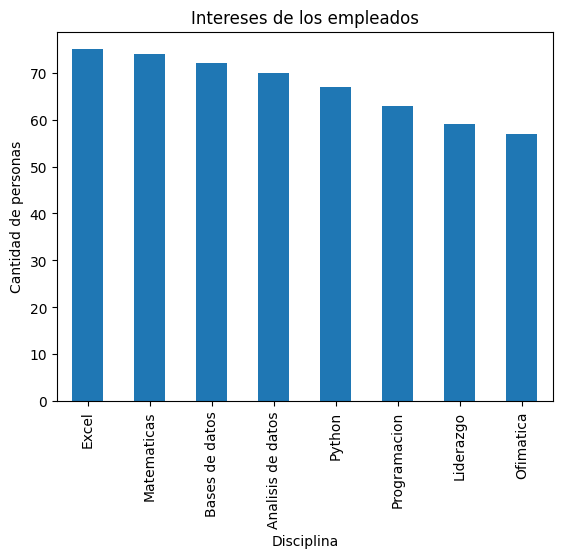

In [ ]:
intereses.plot(kind='bar')
plt.title('Intereses de los empleados')
plt.xlabel('Disciplina')
plt.ylabel('Cantidad de personas')
plt.show()

La disciplina que mas se quiere aprender es excel seguida de matematicas y algunos componentes de las ciencias de datos como lo son bases de datos python y programacion, la ofimatica esta de ultimas de esto se infiere que dado el promedio de edad de edad oscila en un rango donde las personas ya son profesionales, esta disciplina es de baja demanda porque ya se cuenta con la experiencia en su manejo, ahora bien se analizaran los rangos de edad por cada disciplina para obtener unos ultimos insigths

In [ ]:
filtro_1=datos_interes.loc[:,[' PUESTO DE TRABAJO ACTUAL','ESTUDIOS COMPLEMENTARIOS 1','EDAD']]   


,PUESTO DE TRABAJO ACTUAL,ESTUDIOS COMPLEMENTARIOS 1,EDAD
0,Consultor,Python,30
1,Diseñador,Ofimatica,41
2,Programador,Bases de datos,56
3,Gerente,Programacion,53
4,Desarrollador,Bases de datos,51
...,...,...,...
532,Investigador,Programacion,33
533,Técnico,Analisis de datos,30
534,Gerente,Programacion,39
535,Programador,Python,51


In [ ]:
grupo_1 = filtro_1.groupby([' PUESTO DE TRABAJO ACTUAL','ESTUDIOS COMPLEMENTARIOS 1'])['EDAD'].count()
grupo_1.head(30)

 PUESTO DE TRABAJO ACTUAL  ESTUDIOS COMPLEMENTARIOS 1
Analista                   Analisis de datos              3
                           Bases de datos                 1
                           Excel                          7
                           Liderazgo                      1
                           Matematicas                    3
                           Ofimatica                      3
                           Programacion                   2
                           Python                         5
Asistente                  Analisis de datos              6
                           Bases de datos                 3
                           Excel                          6
                           Liderazgo                      4
                           Matematicas                    3
                           Ofimatica                      1
                           Programacion                   3
                           Python             

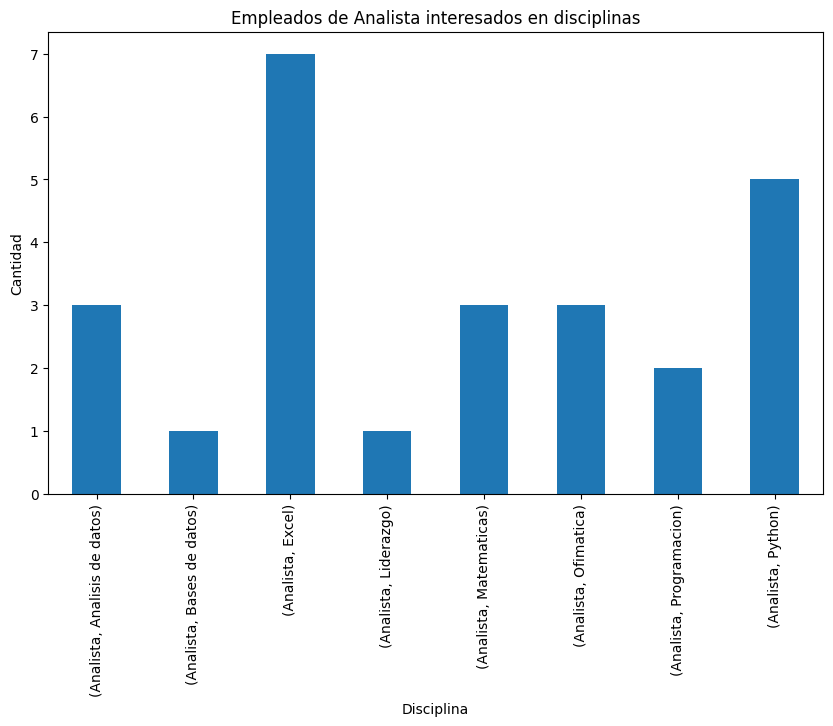

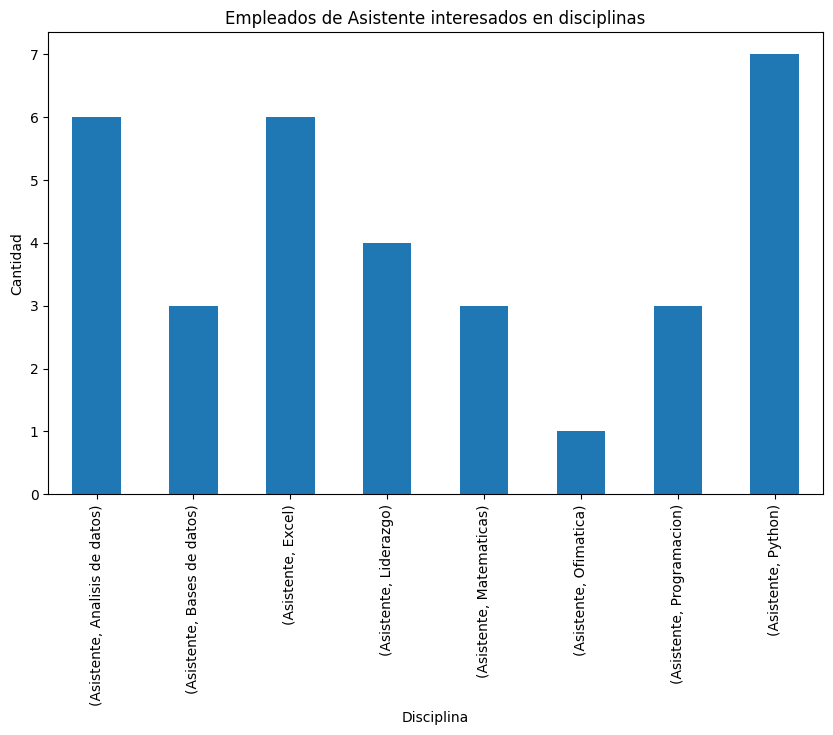

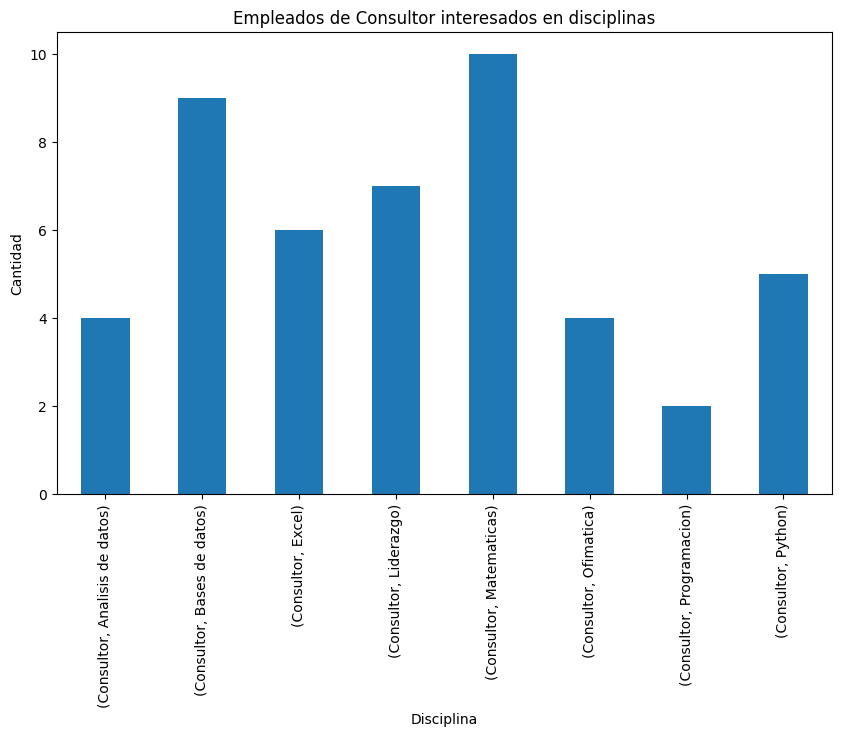

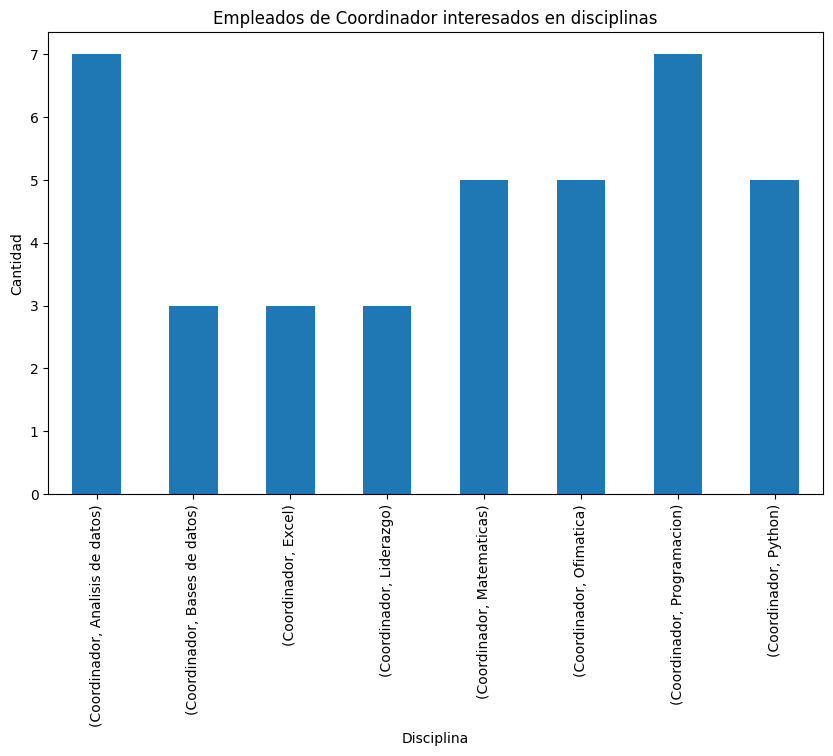

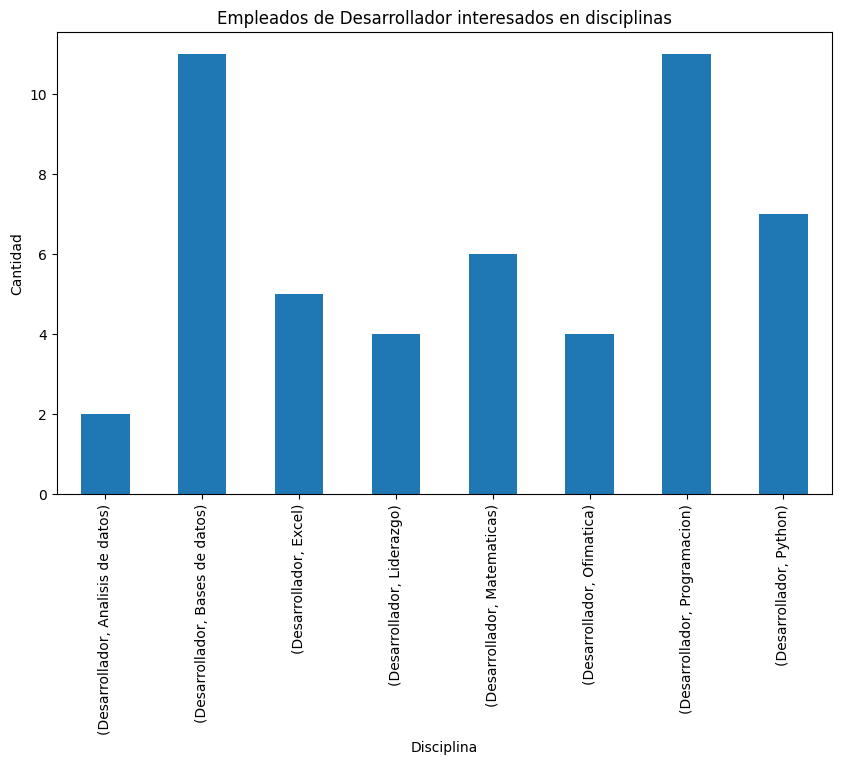

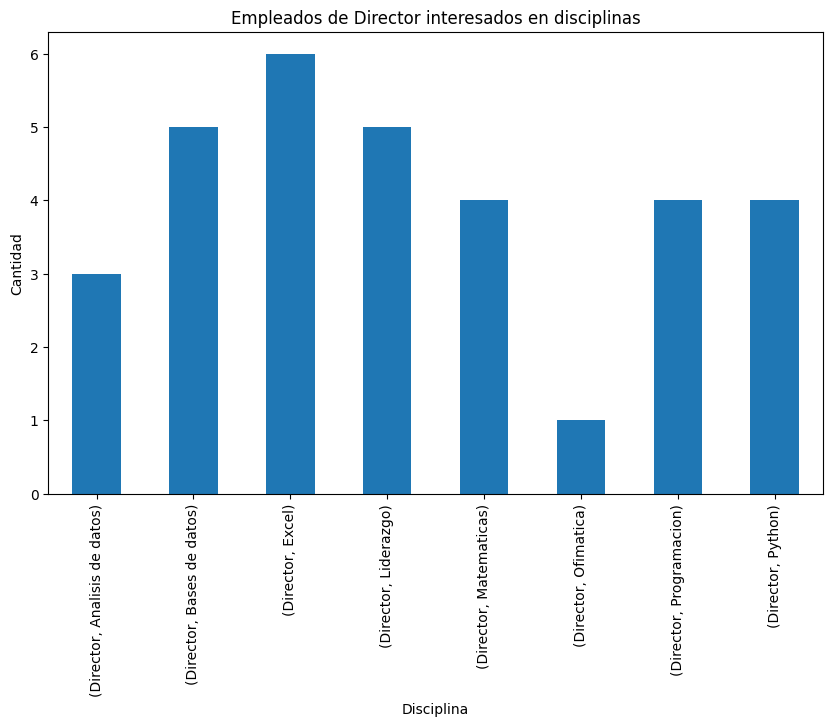

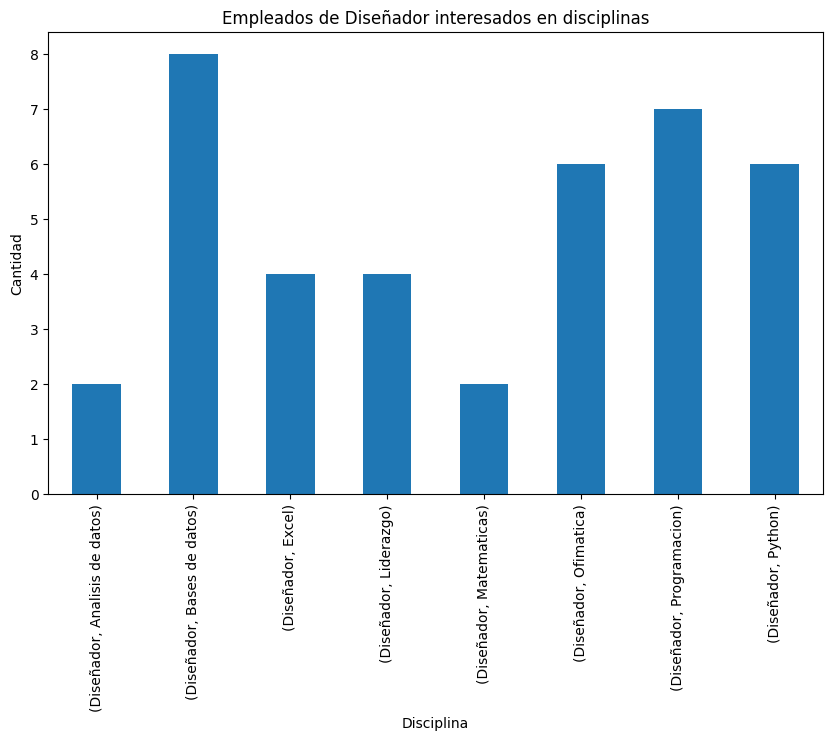

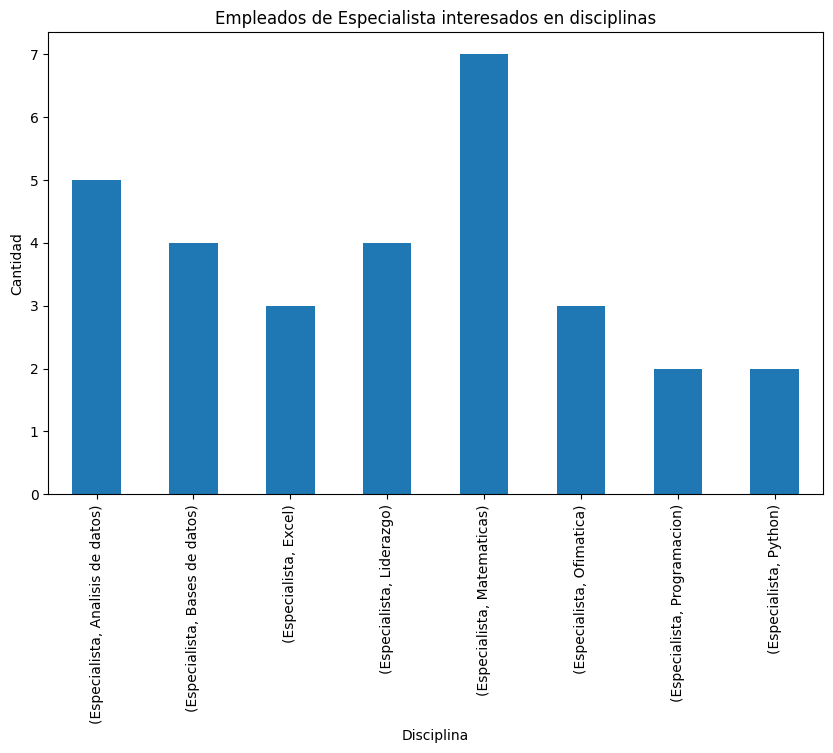

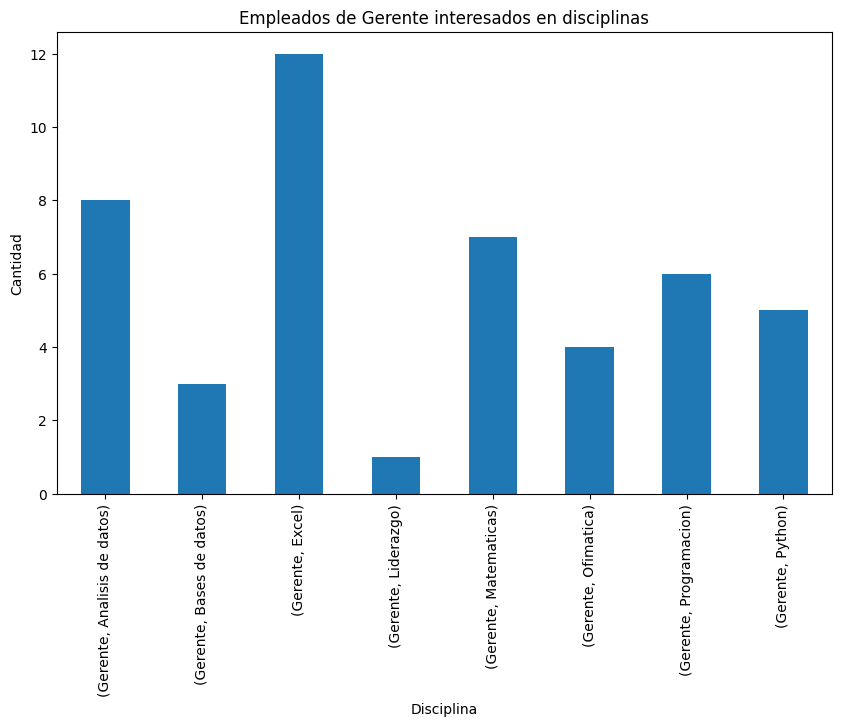

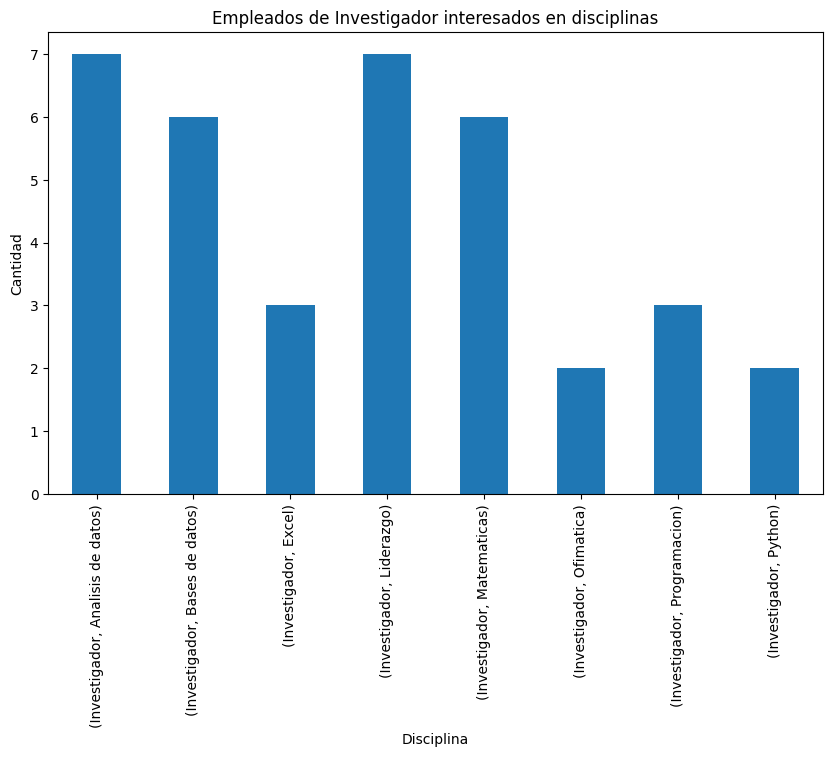

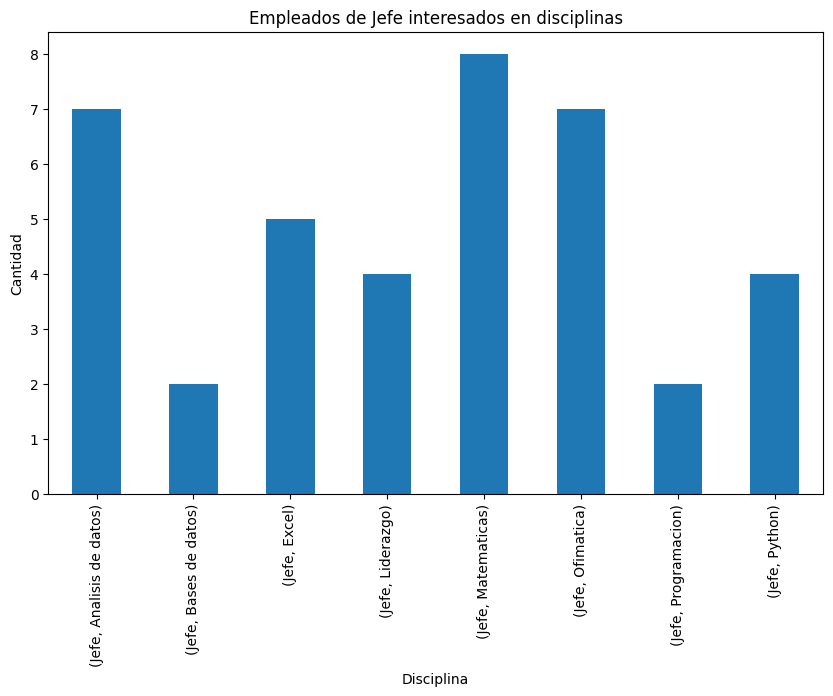

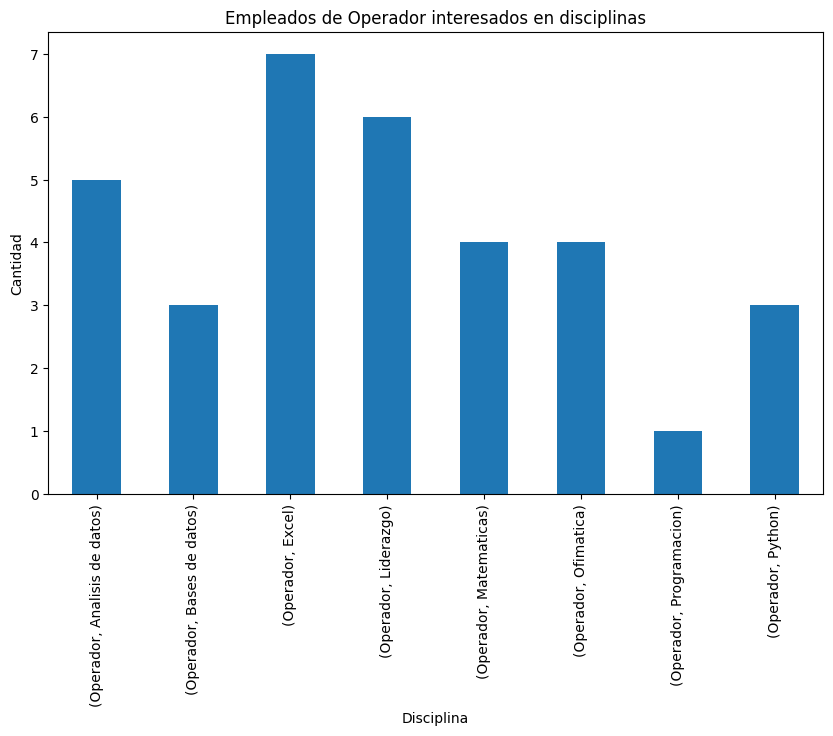

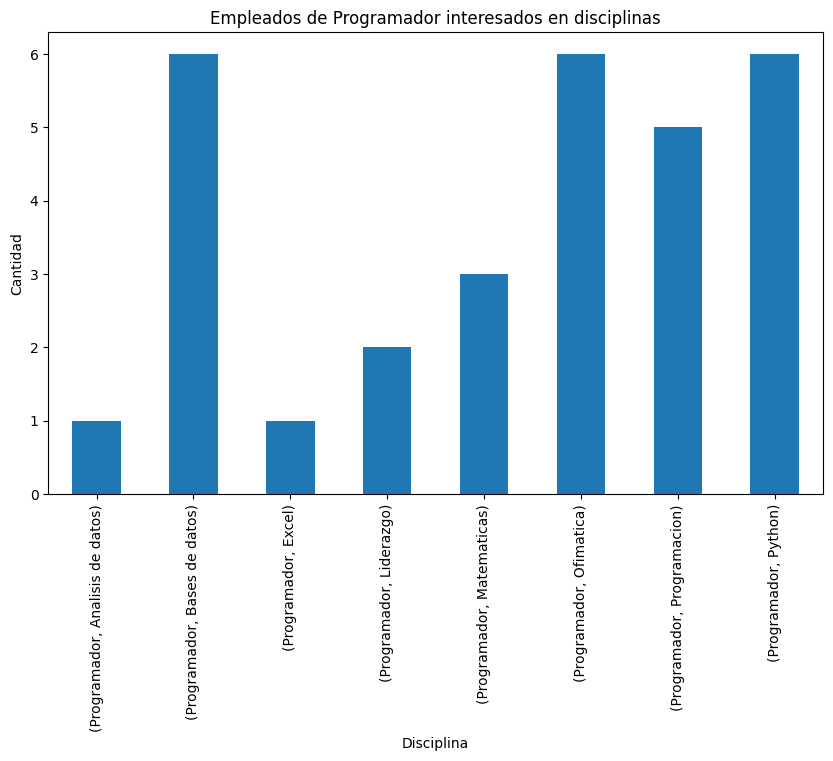

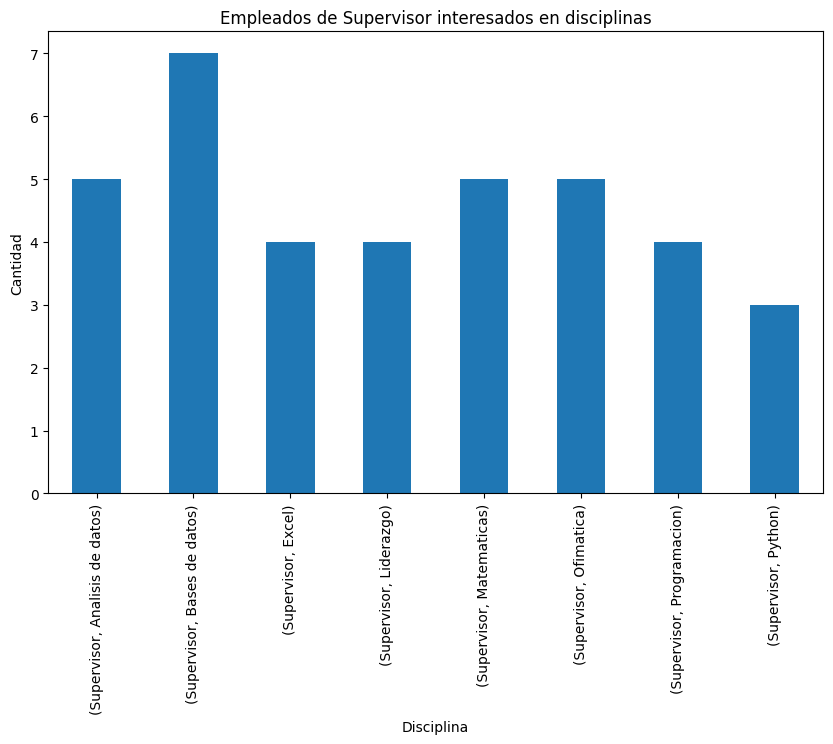

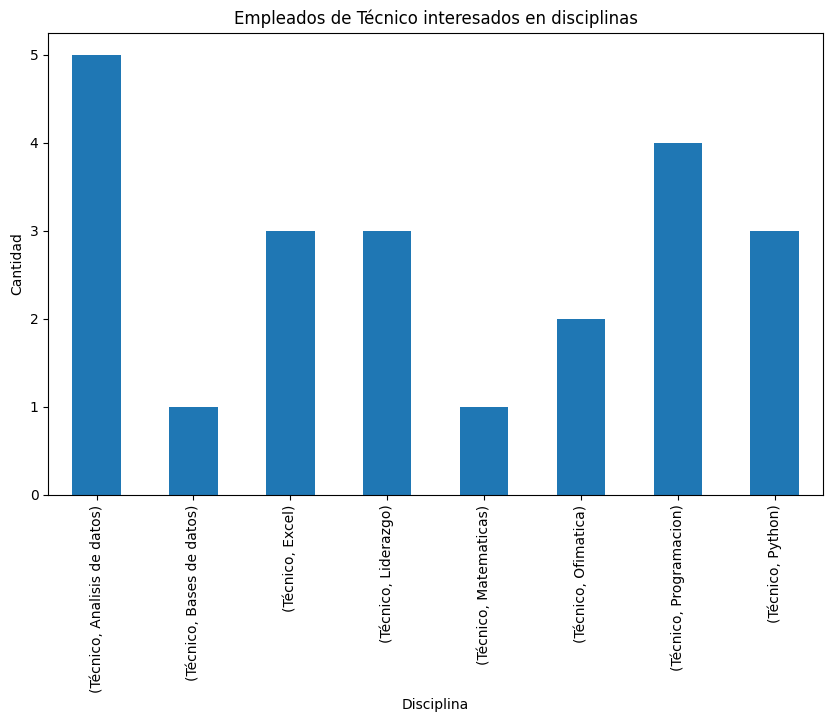

In [ ]:
for puesto, data in grupo_1.groupby(' PUESTO DE TRABAJO ACTUAL'):
    fig, ax = plt.subplots(figsize=(10, 6))
    data.plot(kind='bar', x='ESTUDIOS COMPLEMENTARIOS 1', y='EDAD', ax=ax)
    ax.set_xlabel('Disciplina')
    ax.set_ylabel('Cantidad')
    ax.set_title(f'Empleados de {puesto} interesados en disciplinas')
    plt.show()


Se analizar cada uno de los cargos que se tiene acontinuacion, y las disciplinas que cada uno esta interesado en aprender, en un vistazo rapido se ve que cada uno esta interesado en interesadoe en seguir creciendo en la disciplina en la cual ejerce, por ejemplo el el programador esta mas interesado en las bases de datos y en python